### Лабораторная работа №3

#### Герасимова Екатерина Васильевна  
Вариант 17 


Набор данных 4  
Классификаторы   
1 -  классификатор K ближайших соседей (задаётся количество ближайших объектов),   
3 – линейный классификатор (персептрон)

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.data.txt', names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])


In [3]:
ir_data = pd.DataFrame(iris)
ir_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

Sepal Length - Длина чашелистника в см (число)

Sepal Width - Ширина чашелистника в см (число)

Petal Length - Длина лепестка в см (число)

Petal Width - Ширина лепестка в см (число)

Species - Вид : 1 - Iris Setosa 2 - Iris Versicolour 3 - Iris Virginica

#### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [4]:
ir_data.shape

(150, 5)

In [5]:
ir_data = ir_data.drop_duplicates()
ir_data.shape

(147, 5)

#### 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

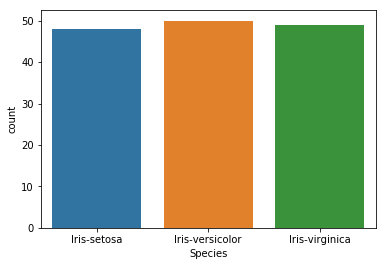

In [6]:
sns.countplot(x='Species', data=ir_data)

countplot - считает количество значений в каждой категории.

дисбаланса классов нет выбирает ROC кривую

#### 4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

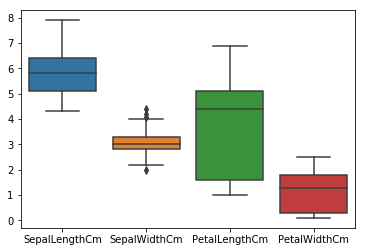

In [7]:
mashtabpriz = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
sns.boxplot(data=ir_data[mashtabpriz])
plt.show()

Масштабирование данных будем выполнять с помощью нормализации (0;1).

In [8]:
from sklearn import preprocessing

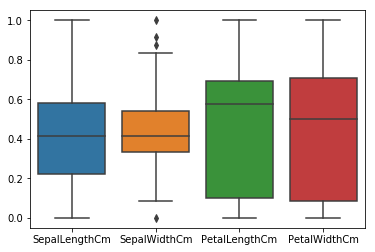

In [9]:
scaler = preprocessing.MinMaxScaler()
ir_data[mashtabpriz] = scaler.fit_transform(ir_data[mashtabpriz].values.astype(float))
sns.boxplot(data=ir_data[mashtabpriz])
plt.show()

#### 5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb_enc = LabelEncoder() 
ir_data['Species'] = lb_enc.fit_transform(ir_data['Species'])
ir_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


Выбрали способ замены с помощью LabelEncoding, который преобразовал Species в числа 0, 1, 2.
LabelEncoder - используeтся для преобразования категориальных или текстовых данных в числа, которые наши предсказательные модели понимают.

#### 6.Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

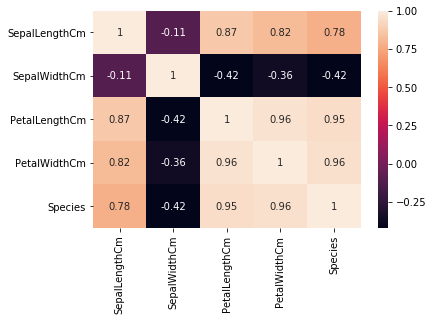

In [12]:
ir_data_corr = ir_data.corr()
sns.heatmap(ir_data_corr, annot = True)

#### 7.Заполните пропущенные значения в данных;

In [13]:
ir_data.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Пропущенных значений в данных нет

#### Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

In [37]:
from sklearn.preprocessing import label_binarize
import sklearn as skl
import scipy.stats as stats
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

In [38]:
X = np.array(ir_data.drop('Species', axis=1))
y = np.array(ir_data['Species']) 
y = label_binarize(y, classes=[x for x in range(3)])
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size = 0.5, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(73, 4)
(74, 4)


In [39]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print ("обучающая выборка: ",N_train," тестовая выборка: " ,N_test)

обучающая выборка:  73  тестовая выборка:  74


К ближайших соседей

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) # обучаем на тренировочных выборках

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
y_train_predict = knn.predict(X_train) # пробуем предсказать по тренировочной выборке
y_test_predict = knn.predict(X_test) # пробуем предсказать по тестовой выборке

err_train = np.mean(y_train != y_train_predict) # считаем ошибки по тренирововчной выборке
err_test  = np.mean(y_test  != y_test_predict) # считаем ошибки по тестовой выборке
print ("ошибки по тренировочной выборке: ",err_train,"ошибки по тестовой выборке: ", err_test)

ошибки по тренировочной выборке:  0.0365296803652968 ошибки по тестовой выборке:  0.02702702702702703


In [42]:
# находим оптимальное число соседей
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print ("минимальная ошибка: ", best_cv_err, "лучшее число соседей: ", best_n_neighbors)

минимальная ошибка:  0.0547945205479452 лучшее число соседей:  1


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
# пересчитываем при оптимальном числе соседей
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print ("Ошибка на тренировочной выборке: ", err_train, "ошибка на тестовой выборке: ", err_test)

Ошибка на тренировочной выборке:  0.0 ошибка на тестовой выборке:  0.036036036036036036


линейный классификатор (персептрон)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = ir_data.drop('Species', axis=1)
y = ir_data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [46]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 100)],
}, n_jobs=-1)
search.fit(X_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(X_train, y_train)
ppn_predict = ppn.predict(X_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best: 0.9313725490196079 alpha: 0.05263157894736842 max_iter: 65
Accuracy ppn: 0.75556


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no